# Death row project


# Part 1: Webscrapping

NOTE: Webscrapped the Texas department for criminal justice website for offender info and last statements. Note that the data is not all there and the code needs to be slightly more robust to work properly, but the underlying ideas for webscrapping are there which can be used for future reference. 

In [370]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
from re import findall
import pandas as pd
pd.set_option('display.max_columns', 50)
import missingno as msno

### Webpage 1: main

In [232]:
URL = 'https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [248]:
# narrow down the infomation in the html
tr = soup.find('table', {'class': 'tdcj_table indent'}).find_all("tr")

# get df column names 
col_names = []
for th in tr[0].find_all('th'):
    col_names.append(th.text.replace('\n', ' ').strip())

col_names.insert(1, 'Offender_info')
col_names.insert(2, 'Last_statement')
col_names = [i for i in col_names if i != 'Link']

# get the main data 
data = []
web_info = []

for i in tr[1:]:
    for td in i.find_all('td'):
        data.append(td.text.replace('\n', ' ').strip())
    web_info.append(findall('/([^.]+)', i.find('a').get('href')))
        

data = list(map(list,zip(*[iter(data)]*10)))
web_info = [item for sublist in web_info for item in sublist]

### Webpage 2: Offender_info

In [162]:
# get headings for new data

URL = 'https://www.tdcj.texas.gov/death_row/dr_info/ochoaabel.html'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

tr = soup.table.find_all("tr")

headings = []
for i in tr:
    headings.append(i.find('td', {'class': 'table_deathrow_bold_align_right'}).text.replace('\n', ' ').strip())

print(headings)

['Name', 'TDCJ Number', 'Date of Birth', 'Date Received', 'Age (when Received)', 'Education Level (Highest Grade Completed)', 'Date of Offense', 'Age (at the time of Offense)', 'County', 'Race', 'Gender', 'Hair Color', 'Height (in Feet and Inches)', 'Weight (in Pounds)', 'Eye Color', 'Native County', 'Native State']


In [264]:
values = []
errors = []
counter = 0

for name in web_info[:]:

    try:
        URL = 'https://www.tdcj.texas.gov/death_row/dr_info/'+name+'.html'
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')
        tr = soup.table.find_all("tr")

        for td in tr:
            values.append(td.find('td', {'class': 'table_deathrow_align_left'}).text.replace('\n', ' ').strip())

        counter+=1
        print(counter, name)
        time.sleep(10) 
        
    except Exception:
        errors.append(name)
        print('Error for: ' + name)
        counter+=1
        time.sleep(10)
        continue

1 ochoaabel
2 gardnerjohn
3 runnelstravis
4 halljusten
5 sparksrobert
6 solizmarkanthony
7 crutsingerbilly
8 swearingenlarry
9 kingjohn
Error for: _coble
Error for: jenningsrobert
12 brazielalvin
13 garciajoseph
Error for: _ramos
15 ackerdaniel
16 clarktroy
17 youngchristopher
18 bibledanny
19 castillojuan
20 davilaerick
21 rodriguezrosendo
22 battagliajohn
23 rayfordwilliam
24 shoreanthony
25 cardenasruben
Error for: death_row/dr_info/pruettrobert
27 preyortaichin
Error for: bigbyjames
Error for: ruizroland
30 edwardsterry
31 wilkinschristopher
32 fullerbarney
33 vasquezpablo
34 wardadam
35 wesbrookcoy
Error for: garciagustavo
37 freemanjames
38 mastersonrichard
39 holidayraphael
40 escamillalicho
41 garciajuan
42 lopezdaniel
43 russeaugregory
Error for: bowerlester
45 charlesderrick
46 garzamanuel
47 sprousekent
48 vasquezmanuel
49 newburydonald
50 laddrobert
Error for: prietoarnold
52 paredesmiguel
53 colemanlisa
Error for: trottiewillie
55 villegasjose
56 hernandezramiro
57 sellsto

Error for: tuttlecharles
Error for: faulderjoseph
Error for: littlewilliam
Error for: colemanclydell
Error for: delacruzjose
396 foustaaron
Error for: whiteexcell
Error for: rectorcharles
Error for: greennorman
Error for: cantuandrew
Error for: barberdanny
Error for: cordovageorge
Error for: vegamartin
Error for: farristroy
Error for: moodyjohn
Error for: meanesjames
Error for: emeryjeff
Error for: corwindaniel
Error for: mcduffkenneth
Error for: noblesjohnathan
Error for: cruzjavier
Error for: castillodavid
Error for: teaguedelbert
Error for: camachogenero
Error for: narvaizleopoldo
Error for: pylesjohnny
417 boggessclifford
Error for: munizpedro
Error for: carterrobertanthony
Error for: mcfarlandfrank
Error for: goschlesley
Error for: cannonjoseph
Error for: hoguejerry
Error for: renfrosteven
Error for: tuckerkarla
Error for: lockhartmichael
Error for: livingstoncharlie
Error for: sharpmichael
Error for: fulleraaron
Error for: lautiaua
Error for: ransomkenneth
Error for: greenricky
E

In [351]:
values = [item for sublist in values for item in sublist]

In [354]:
# remove whitespace 
values = [i for i in values if i] 

# create list of lists for each person
values = list(map(list,zip(*[iter(values)]*17)))

### Webpage 3: last_statement

In [267]:
statements = []
errors2 = []
counter = 0

for name in web_info[:]:
    try: 
        URL = 'https://www.tdcj.texas.gov/death_row/dr_info/'+name+'last.html'
        page = requests.get(URL)

        soup = BeautifulSoup(page.content, 'html.parser')

        statements.append(soup.body.find('div', {'id': 'content_right'}).find_all('p')[5].text.replace('\n', ' ').strip())
    
        counter+=1
        print(counter, name)
        time.sleep(10) 
        
    except Exception:
        errors2.append(name)
        print('Error for: ' + name)
        counter+=1
        time.sleep(10)
        continue

1 ochoaabel
2 gardnerjohn
3 runnelstravis
4 halljusten
5 sparksrobert
6 solizmarkanthony
7 crutsingerbilly
8 swearingenlarry
9 kingjohn
Error for: _coble
11 jenningsrobert
12 brazielalvin
13 garciajoseph
Error for: _ramos
15 ackerdaniel
16 clarktroy
17 youngchristopher
Error for: bibledanny
19 castillojuan
20 davilaerick
21 rodriguezrosendo
22 battagliajohn
23 rayfordwilliam
24 shoreanthony
25 cardenasruben
Error for: death_row/dr_info/pruettrobert
27 preyortaichin
28 bigbyjames
Error for: ruizroland
30 edwardsterry
31 wilkinschristopher
32 fullerbarney
33 vasquezpablo
34 wardadam
35 wesbrookcoy
36 garciagustavo
Error for: freemanjames
38 mastersonrichard
39 holidayraphael
40 escamillalicho
41 garciajuan
42 lopezdaniel
43 russeaugregory
44 bowerlester
45 charlesderrick
46 garzamanuel
47 sprousekent
48 vasquezmanuel
49 newburydonald
50 laddrobert
51 prietoarnold
52 paredesmiguel
53 colemanlisa
54 trottiewillie
55 villegasjose
56 hernandezramiro
57 sellstommy
58 doyleanthony
59 jasperray

447 maddenrobert
448 whitelarry
449 callinsbruce
450 lackeyclarence
Error for: drinkardrichard
452 belyeuclifton
453 westleyanthony
Error for: washingtonterry
Error for: baldreeernest
Error for: boylebenjamin
457 gentrykenneth
Error for: woodsbillyjoe
459 spencedavid
460 hermandavid
461 barefieldjohn
462 brimagerichard
463 gonzalesjoe
Error for: granvielkenneth
Error for: jenkinsleo
Error for: briddlejames
Error for: bandaesequel
468 vuonghai
Error for: amosbernard
Error for: laneharold
471 johnsoncarl
472 sattiewhitevernon
Error for: hammondkarl
474 fearancejohn
Error for: allridgeronald
476 mannfletcher
Error for: maysnoble
Error for: hawkinssamuel
479 gardnerbilly
480 motleyjeffery
Error for: wiliamwillie
482 russellclifton
483 marquezmario
484 jacobsjesse
485 kinnamonraymond
486 clarkherman
487 bridgewarren
488 williamswalter
Error for: lottgeorge
490 gutierrezjessie
491 drewrobert
492 crankdenton
493 netherystephen
Error for: rougeaupaul
Error for: andersonlarry
Error for: beavers

In [380]:
print(len(data))
print(len(col_names))
print(len(headings))
print(len(values))
print(len(errors))
print(len(statements))
print(len(errors2))

569
10
17
153
391
432
137


### Create dfs and combine them into one. 

In [288]:
main_df = pd.DataFrame.from_records(data, columns=col_names)
main_df.rename(columns = {'TDCJNumber':'TDCJ Number'}, inplace = True)

In [377]:
print(main_df.shape)
main_df.head(2)

(569, 10)


,Execution,Offender_info,Last_statement,Last Name,First Name,TDCJ Number,Age,Date,Race,County
0,569,Offender Information,Last Statement,Ochoa,Abel,999450,47,2/6/2020,Hispanic,Dallas
1,568,Offender Information,Last Statement,Gardner,John,999516,64,1/15/2020,White,Collin


In [364]:
offender_info_df = pd.DataFrame.from_records(values, columns=headings)
offender_info_df = offender_info_df.drop(['County', 'Race'], axis = 1)

In [378]:
print(offender_info_df.shape)
offender_info_df.head(2)

(153, 15)


,Name,TDCJ Number,Date of Birth,Date Received,Age (when Received),Education Level (Highest Grade Completed),Date of Offense,Age (at the time of Offense),Gender,Hair Color,Height (in Feet and Inches),Weight (in Pounds),Eye Color,Native County,Native State
0,"Ochoa, Abel Revill",999450,01/23/1973,05/15/2003,30,12,08/04/2002,29,Male,Black,5′ 6″,182,Brown,Vicente Guerrero,"Durango, Mexico"
1,"Gardner, John",999516,01/03/1956,11/20/2006,50,12,01/23/2005,49,Male,Brown,6′ 0″,190 lbs,Blue,Forest,Mississippi


In [379]:
joined_df = pd.merge(main_df, offender_info_df, on='TDCJ Number', how='left')
joined_df[0:4]

,Execution,Offender_info,Last_statement,Last Name,First Name,TDCJ Number,Age,Date,Race,County,Name,Date of Birth,Date Received,Age (when Received),Education Level (Highest Grade Completed),Date of Offense,Age (at the time of Offense),Gender,Hair Color,Height (in Feet and Inches),Weight (in Pounds),Eye Color,Native County,Native State
0,569,Offender Information,Last Statement,Ochoa,Abel,999450,47,2/6/2020,Hispanic,Dallas,"Ochoa, Abel Revill",01/23/1973,05/15/2003,30,12,08/04/2002,29,Male,Black,5′ 6″,182,Brown,Vicente Guerrero,"Durango, Mexico"
1,568,Offender Information,Last Statement,Gardner,John,999516,64,1/15/2020,White,Collin,"Gardner, John",01/03/1956,11/20/2006,50,12,01/23/2005,49,Male,Brown,6′ 0″,190 lbs,Blue,Forest,Mississippi
2,567,Offender Information,Last Statement,Runnels,Travis,999505,46,12/11/2019,Black,Potter,"Runnels, Travis Trevino",12/17/1972,11/18/2005,32,11,01/29/2003,30,Male,Black,6′ 0″,208,Brown,Dallas,Texas
3,566,Offender Information,Last Statement,Hall,Justen,999497,38,11/6/2019,White,El Paso,"Hall, Justen Grant",06/16/1981,05/11/2005,23,9,10/28/2002,21,Male,Brown,6′5″,197,Hazel,El Paso,Texas


### Future improvements 

Could make code more robust, but I understand the main webscrapping concepts now and this will take a long time. To improve: 

- Look for errors and rerun code:

values - not getting all rows (because some use photos)

Statements - web address doesn't use the same name as offender info, 
Create single list of those who I managed to pull/didn't and then use this list to help join assets to the df

- replace last statement col with last statement 

```
for i in data:
    i[2]='Last_statement'
```
    
- View missing data 

```
final_df.isnull().sum()
final_df.fillna(method='ffill')
msno.matrix(final_df);
```

# Part 2: Text analysis

As I know how to clean the data but it will take ages let's skip the cleaning phase and just import the cleaned dataset from kaggle: https://www.kaggle.com/mykhe1097/last-words-of-death-row-inmates 

The objective of this section is to obtain: 


- a word cloud and top used words
- Sentiment analysis 
- topic modelling 
- word counts, unique word counts, sentance counts, punctuation counts, adjectives, nouns, verbs, complexity of speech 
- classification to predict if individual has previously committed a crime
- future improvements 

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)
from collections import Counter
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
import time

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import spacy
nlp = spacy.load('en')


from textstat.textstat import textstatistics
from textblob import TextBlob
from gensim.utils import simple_preprocess

from wordcloud import WordCloud

import pyLDAvis
import pyLDAvis.gensim


from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import eli5

In [465]:
df = pd.read_csv('Texas Last Statement - CSV.csv', encoding='ISO-8859-1')

In [466]:
print(df.shape)
df.head(2)

(545, 20)


,Execution,LastName,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther Races,FemaleVictim,MaleVictim,LastStatement
0,545,Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28.0,11.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"This is my statement: My final words. First, I..."
1,544,Pruett,Robert,999411,38,White,Bee,22.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,I just want to let everyone in here to know I ...


### Global variables

Define functions which are used later

In [467]:
def word_counts(df, col_name):
    '''    
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with word counts for a given text.'''
    
    df['wordcounts'] = df[col_name].str.count(' ') + 1
    
# alternative for word counts: df['LastStatement_wordcounts'] = df['LastStatement'].apply(lambda x: len(word_tokenize(x.translate(str.maketrans('', '', punctuation)))))

    
def unique_word_counts(df, col_name):
    '''
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with unique word counts for a given text.'''
    
    df['uniqueword_counts'] = df[col_name].apply(lambda text: len(Counter(re.sub(' +', ' ', text.replace('\n','')).lower().split()).keys()))


def sentance_counts(df, col_name):
    '''
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with sentance counts for a given text.'''
    

    df['sentance_counts']= df[col_name].apply(lambda text: len(sent_tokenize(re.sub(' +', ' ', text.replace('\n','')))) if text!='None' else 0)

    
def syllable_counts(df, col_name):
    '''
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with syllable counts for a given text.'''
    

    df['syllable_counts']= df[col_name].apply(lambda text: textstatistics().syllable_count((re.sub(' +', ' ', text.replace('\n','')))) if text!='None' else 0)
    


def stop_word_counts(df, col_name):
    '''
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with stop word counts for a given text.'''
    
    df['stop_words_count']= df[col_name].apply(lambda text: len([token for token in nlp(re.sub(' +', ' ', text.replace('\n','')).translate(str.maketrans('', '', string.punctuation))) if token.is_stop]))



def word_types_count(df, col_name):
    '''
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds new DataFrame columns with counts for nouns, verbs, adverbs, adjectives, pronouns 
    and punctuation'''
    

    # note there are other word types than those listed below, they are just the main ones
    nouns = []
    verbs = []
    adverbs = []
    adjectives = []
    pronouns = []
    punctuation = []

    # for text in each row of the df col specified double whitespace and '\n' are removed
    # for each token in each text the word type is extracted and placed in a list 
    for text in df[col_name]:
        temp_lst = []
        for token in nlp(re.sub(' +', ' ', text.replace('\n',''))):  
            if not token.is_stop:
                word_type = spacy.explain(token.tag_).partition(',')[0].partition(' ')[0]
                temp_lst.append(word_type)

        # creates a dictionary of counts of each word type
        word_types_dict = Counter(temp_lst)

        # appends the values of each word type for each row to a list (zeros are given if non found)
        nouns.append(word_types_dict.get('noun', 0))
        verbs.append(word_types_dict.get('verb', 0))
        adverbs.append(word_types_dict.get('adverb', 0))
        adjectives.append(word_types_dict.get('adjective', 0))
        pronouns.append(word_types_dict.get('pronoun', 0))
        punctuation.append(word_types_dict.get('punctuation', 0)+word_types_dict.get('opening', 0)+word_types_dict.get('closing', 0))

    # appends new columns to the df    
    df['nouns'] = nouns
    df['verbs'] = verbs
    df['adverbs'] = adverbs
    df['adjectives'] = adjectives
    df['pronouns'] = pronouns
    df['punctuation'] = punctuation
    
    
# alternative for punctuation counts (this method also counts apostrophe's where as the other one I use doesn't): df['punct_counts']= df['LastStatement'].apply(lambda x: len([ch for ch in x if ch in punctuation]))    
    
    
def flesch_reading_ease(df, col_name): 
    """ Implements Flesch Formula: 
        Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW) 
        Here, 
          ASL = average sentence length (number of words  
                divided by number of sentences) 
          ASW = average word length in syllables (number of syllables  
                divided by number of words) 
    
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with Flesch reading scores for a given text."""
    
    words = (df[col_name].str.count(' ') + 1).to_list()
    sentances = df[col_name].apply(lambda text: len(sent_tokenize(re.sub(' +', ' ', text.replace('\n','')))) if text!='None' else 0).to_list()
    syllable = df[col_name].apply(lambda text: textstatistics().syllable_count((re.sub(' +', ' ', text.replace('\n','')))) if text!='None' else 0).to_list()

    ASL = [round(w/s, 2) if s!=0 else 0 for w,s in zip(words, sentances)]
    ASPW = [round(s/w, 2) if s!=0 else 0 for s,w in zip(syllable, words)]
    FRE = [round(206.835 - (1.015 * i) - (84.6 * j), 2)  for i,j in zip(ASL, ASPW)]

    df['flesch_reading_ease'] = FRE     


def wordcloud(df, col_name, num=0):
    
    text = " ".join(df[col_name].to_list())

    # remove '\n', 'ÿ' and all punctuation (including apostrophes)
    text = text.replace('\n','').replace('ÿ','').translate(str.maketrans('', '', string.punctuation))
    doc = nlp(text)

    # add stop words
    nlp.vocab["y"].is_stop = True
    nlp.vocab["m"].is_stop = True
    nlp.vocab["nt"].is_stop = True
    tokens = [token.text.lower() for token in doc if not token.is_space | token.is_stop]

    # create dict of word frequencies 
    token_dict = Counter(tokens)

    # Plot wordcloud 
    wordcloud = WordCloud(width=1600, height=800, max_font_size=150)
    wordcloud.generate_from_frequencies(frequencies=token_dict)
    plt.figure(figsize=(15,10), facecolor='k')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    print(token_dict.most_common(num))

    return plt.show()


def sentiment_scores(df, col_name):
    '''
    Parameters: 
    df (DataFrame): the name of a DataFrame
    col_name (string): the name of a column in the df that contains text
    
    Output: 
    Adds a new column to the DataFrame with sentiment for a given text.'''
    
    df['sentiment'] = df[col_name].apply(lambda text: TextBlob((re.sub(' +', ' ', text.replace('\n','')))).sentiment[0])
    
    
def preprocess(text):
    '''Preprocesses text by:
    - tokenising, keeping accents, removing words <2 letters or >10 letters
    - removing punctuation 
    - removing non-alphabetic tokens 
    - removing stop words
    - lemmatizing tokens
    - stemming tokens
    
    Parameters: 
    text (string): a string of text
    
    Output: 
    tokens (list): a list of cleaning tokens
    
    '''
    tokens = simple_preprocess(text, deacc=False, min_len=2, max_len=10)
    tokens = [ch.translate(str.maketrans('', '', string.punctuation)) for ch in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if not token in stop_words]
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    tokens = [PorterStemmer().stem(token) for token in tokens]
    return tokens


def show_topics(vectorizer, lda_model, n_topics=10):
    '''Show top n keywords for each topic
    
    Paramters:
    vectorizer (sklearn vectoriser: vectoriser
    lda_model (sklearn model): LDA model
    n_topics (int): num of topics
    
    Output:
    topic_keywords (list): a list of topics'''
    
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_topics]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

### Sentiment analysis 

- 2 methods for sentiment analysis: textblob and vader (vader is used more for social media data as it can handle emojis)

In [210]:
text = re.sub(' +', ' ', (df["LastStatement"][3]).replace('\n',''))
text

"Yes, I do, Grace Kehler is that you? I have given Warden Jones a written statement that will explain a lot more. I hope this will bring you closure and answers to some questions. I hope this will bring you peace and I'm sorry for all the pain and suffering. I'm sorry it went on for a terribly long time. I'm sorry to you especially Grace Kehler. To the Kehler, Johnson and Crain family, I pray that you won't hate Jesus, the letter will explain more. I'm sorry. I'm sorry. I hope that my death will bring you peace and closure. I pray that maybe someday will bring you peace. I hope that you could forgive me, but if you don't I understand. I don't think I could forgive anyone who would of killed my children. I'm sorry for your suffering you've had for a long time. I'm sorry, I'm sorry. I love you Lord Jesus, Lord Jesus."

In [215]:
# note that polarity is between -1(neg) and 1 (pos), subjectivity is between 0 and 1 (1 = more subjective)
blob = TextBlob(text)                
blob.sentiment

Sentiment(polarity=-0.22499999999999998, subjectivity=0.76875)

In [212]:
# note that compound is between -1 (neg) and 1 (pos)
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(text)

{'neg': 0.166, 'neu': 0.631, 'pos': 0.203, 'compound': 0.7674}

In [218]:
# use function created above using textblob to generate a new column in the df with sentiment scores
sentiment_scores(df, "LastStatement")

### Word Cloud 

[('love', 786), ('family', 354), ('know', 339), ('thank', 307), ('sorry', 276), ('want', 248), ('like', 233), ('god', 231), ('life', 167), ('hope', 165)]


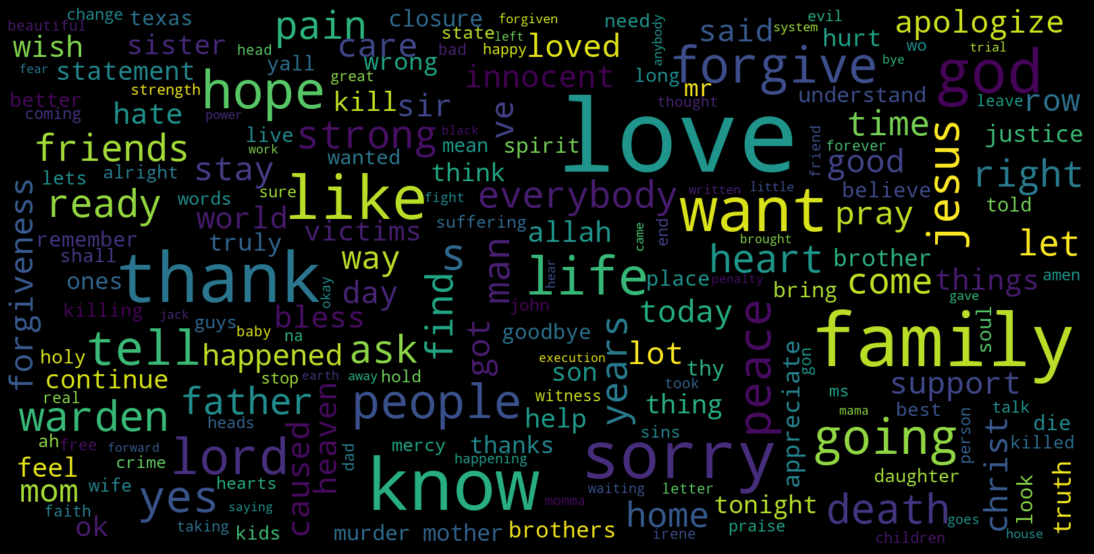

In [170]:
wordcloud(df, 'LastStatement', 10)

### Topic modelling 

- (1) Gensim and (2) sklearn implimentation (with sklearn you can do gridsearch) 

(NOTE, I'M NOTE 100% IF WHEN I DO FLAT LIST OF ALL THE DOCS IF THAT IS RIGHT - DOES THE ALGO NEED TO KNOW THEY ARE DIFFERENT DOCS OR CAN I GROUP THEM ALL TOGETHER??)

In [470]:
# pre-process text
processed_docs = df['LastStatement'].map(preprocess)

# remove comments with less than 3 words and more than 500 words
processed_docs = [text for text in processed_docs if len(text)>3 & len(text)<500]

#### 1. gensim implimentation 

In [471]:
dictionary = gensim.corpora.Dictionary(processed_docs)

# remove frequently occurring stopwords:
# words in less than 2 documents (absolute no.)
# words in more than 0.5 documents (fraction of total corpus size, not absolute no.)
# keep only the first 100000 most frequent tokens
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=100000)

In [369]:
# bag of words 
# for each document create a dictionary reporting how times a word appears
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# TF-IDF
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

# note that I am using bow below, but you could use TF-IDF instead

# log-perplexity
# all of this extra stuff allow you to compare the value to the value in the sklearn implimentation 
print('Log perplexity: ' + str(np.exp(-1. * lda_model.log_perplexity(bow_corpus))))
print('')

# train model 
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=4)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print('')

Log perplexity: 522.450133951194

Topic: 0 
Words: 0.021*"famili" + 0.020*"know" + 0.020*"thank" + 0.019*"sorri" + 0.016*"want" + 0.015*"go" + 0.014*"would" + 0.013*"say" + 0.013*"like" + 0.012*"life"

Topic: 1 
Words: 0.012*"one" + 0.011*"god" + 0.010*"go" + 0.010*"lord" + 0.009*"ya" + 0.009*"know" + 0.009*"would" + 0.009*"hope" + 0.008*"like" + 0.008*"tell"

Topic: 2 
Words: 0.026*"famili" + 0.024*"thank" + 0.022*"know" + 0.019*"god" + 0.018*"want" + 0.014*"like" + 0.014*"would" + 0.013*"go" + 0.012*"hope" + 0.011*"say"



In [365]:
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Applications/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [330]:
# see which topic a new document would be alloacted to 

unseen_document = 'I love my family'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector]):
    print("Topic: {} \tScore: {}\n Words: {}".format(index, score, lda_model.print_topic(index, 5)))
    print('')

Topic: 0 	Score: 0.6152114868164062
 Words: 0.024*"famili" + 0.019*"know" + 0.018*"would" + 0.017*"sorri" + 0.017*"like"

Topic: 1 	Score: 0.1870299130678177
 Words: 0.028*"thank" + 0.020*"go" + 0.016*"god" + 0.014*"want" + 0.014*"know"

Topic: 2 	Score: 0.19775860011577606
 Words: 0.026*"know" + 0.018*"want" + 0.018*"famili" + 0.017*"god" + 0.016*"sorri"



#### 2. Sklearn implimentation 

In [472]:
# convert seperate strings in list of lists to joined strings in a list
processed_docs_joined_strings = [" ".join(i) for i in processed_docs]

In [450]:
# bow and TF-IDF vectoriser 
bow_vectoriser = CountVectorizer(ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(ngram_range=(1,1))

data_vectorized = bow_vectoriser.fit_transform(processed_docs_joined_strings)

In [460]:
# Materialize the sparse data by creating an array
data_array = data_vectorized.toarray()

# Compute Sparsicity = Percentage of Zero cells
print("Sparsicity: ", ((data_array == 0).sum()/data_array.size)*100, "%")
print(data_array.shape)

Sparsicity:  98.61156163113995 %
(416, 2490)


In [452]:
# Define Search Param
search_params = {'n_components': [3]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=2, random_state=100, batch_size=128, n_jobs = -1,)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=2,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=-1,
                                                 perp_tol=0.1, random_state=100,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
                                

In [453]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'n_components': 3}
Best Log Likelihood Score:  -32248.065390269545
Model Perplexity:  740.8004864856241


In [454]:
topic_keywords = show_topics(vectorizer=bow_vectoriser, lda_model=best_lda_model, n_topics=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,love,know,famili,sorri,want,say,would,like,go,hope
Topic 1,love,thank,god,famili,go,sorri,forgiv,lord,life,jesu
Topic 2,love,thank,famili,god,know,want,go,like,would,ye


### Classification to predict if individual has committed a previous crime 

In [513]:
df = pd.read_csv('Texas Last Statement - CSV.csv', encoding='ISO-8859-1')

In [514]:
# add count columns to df for words, unique words, sentances, stop words, nouns, verbs, adverbs, 
# adjectives, pronouns and punctuation, Flesch reading scores

word_counts(df, 'LastStatement')
unique_word_counts(df, 'LastStatement')
sentance_counts(df, 'LastStatement')
syllable_counts(df, 'LastStatement')
stop_word_counts(df, 'LastStatement')
word_types_count(df, 'LastStatement')
flesch_reading_ease(df, 'LastStatement')

In [538]:
# pre-process text
processed_docs = df['LastStatement'].map(preprocess)

# convert seperate strings in list of lists to joined strings in a list
processed_docs_joined_strings = [" ".join(i) for i in processed_docs]

# bow and TF-IDF vectoriser 
bow_vectoriser = CountVectorizer(min_df=0.002, max_df=0.4, ngram_range=(1,1))
#tfidf_vector = TfidfVectorizer(min_df=0.002, max_df=0.4, ngram_range=(1,1))

data_vectorized = bow_vectoriser.fit_transform(processed_docs_joined_strings)

# Materialize the sparse data by creating an array
data_array = data_vectorized.toarray()

# Compute Sparsicity = Percentage of Zero cells
print("Sparsicity: ", round(((data_array == 0).sum()/data_array.size)*100, 2), "%")
print('Array shape: ' + str(data_array.shape))

Sparsicity:  97.97 %
Array shape: (545, 1165)


In [539]:
count_vect_df = pd.DataFrame(data_array, columns=bow_vectoriser.get_feature_names())
df_bow = pd.concat([df, count_vect_df], axis=1)
df_bow.shape

(545, 1197)

In [540]:
# one-hot encoding 
df_bow = pd.get_dummies(df_bow, columns=['Race'])

# drop irrelavant columns
df_bow.drop(['Execution', 'LastName', 'FirstName', 'TDCJNumber', 'CountyOfConviction', 'LastStatement'], axis=1, inplace=True)

In [542]:
print(df_bow.shape)
df_bow.head()

(545, 1194)


,Age,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther Races,FemaleVictim,MaleVictim,wordcounts,uniqueword_counts,sentance_counts,syllable_counts,stop_words_count,nouns,verbs,adverbs,adjectives,pronouns,punctuation,flesch_reading_ease,...,worri,wors,worst,worth,would,write,written,wrong,wrote,ya,yall,ye,yea,yeah,year,yet,yolanda,young,youngster,zero,ÿi,Race_Black,Race_Hispanic,Race_Other,Race_White
0,47,28.0,11.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,139,91,9,174,91,25,17,1,5,0,16,85.41,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,22.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,84,55,10,96,50,24,11,1,4,2,11,101.87,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,46,34.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,35,29,3,45,21,7,4,3,0,1,8,85.86,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,61,36.0,9.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,158,83,16,200,88,31,24,4,10,0,24,89.36,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,44,22.0,10.0,0.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,74,50,2,93,45,16,11,0,2,0,5,62.68,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [560]:
# search for missing values 
cols_with_missing_vals = list(df.columns[df.isnull().any()])
df_bow[cols_with_missing_vals].isnull().sum()

AgeWhenReceived       18
EducationLevel        45
NativeCounty          29
PreviousCrime         36
Codefendants          28
NumberVictim          18
WhiteVictim          121
HispanicVictim       122
BlackVictim          122
VictimOther Races    122
FemaleVictim          19
MaleVictim            19
dtype: int64

In [592]:
# remove rows with nans
df_bow = df_bow.dropna(how='any', subset=['PreviousCrime','Codefendants','NativeCounty '])

# convert nans to zeros
cols = ['WhiteVictim', 'HispanicVictim', 'BlackVictim', 'VictimOther Races', 'FemaleVictim', 'MaleVictim']
df_bow[cols] = df_bow[cols].replace({np.nan:0})

# replace nans with avg value
cols = ["AgeWhenReceived", "EducationLevel", "NumberVictim"]
df_bow[cols]=df_bow[cols].fillna(df_bow.mean().iloc[0])

In [595]:
cols_with_missing_vals = list(df.columns[df.isnull().any()])
df_bow[cols_with_missing_vals].isnull().sum()

AgeWhenReceived      0
EducationLevel       0
NativeCounty         0
PreviousCrime        0
Codefendants         0
NumberVictim         0
WhiteVictim          0
HispanicVictim       0
BlackVictim          0
VictimOther Races    0
FemaleVictim         0
MaleVictim           0
dtype: int64

In [596]:
X_train = np.array(df_bow.loc[:, df_bow.columns != 'PreviousCrime'])
y_train = np.array(df_bow['PreviousCrime'])
X_test = np.array(df_bow.loc[:, df_bow.columns != 'PreviousCrime'])
y_test = np.array(df_bow['PreviousCrime'])

print("Shape of X_train dataset: ", X_train.shape) 
print("Shape of y_train dataset: ", y_train.shape) 
print("Shape of X_test dataset: ", X_test.shape) 
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (485, 1193)
Shape of y_train dataset:  (485,)
Shape of X_test dataset:  (485, 1193)
Shape of y_test dataset:  (485,)


In [597]:
# logistic regresssion
start = time.time()

# define k-fold cross validation test harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=3)

# create model
logreg=LogisticRegression(solver = 'liblinear', max_iter = 2000)

# define hyperparameters
param_grid={"C":[0.1,2], "penalty":["l1"]}

# fit model 
logreg_cv=GridSearchCV(logreg, param_grid, cv=kfold, n_jobs=-1, scoring='accuracy', verbose=1)
logreg_cv.fit(X_train, y_train)

end = time.time()
print('Total time: ' + str(end - start))

print("best tuned hyperparameters : ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.0s remaining:    1.0s


Total time: 2.054086923599243
best tuned hyperparameters :  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.5980113999437671


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.9s finished


In [598]:
# predict test data 
logreg_best = logreg_cv.best_estimator_
y_pred = logreg_best.predict(X_test)

In [628]:
# see top predictors in each class 
train_cols = df_bow.columns.tolist()
train_cols.remove('PreviousCrime')
eli5.show_weights(logreg_best, vec=logreg_best, top=40, feature_names=train_cols)

Weight?,Feature
+0.146,kill
+0.093,pleas
+0.053,god
+0.040,way
+0.033,nouns
+0.026,AgeWhenReceived
+0.026,verbs
+0.024,Age
+0.016,Codefendants
+0.014,NumberVictim


In [603]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred), 4)*100))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred), 4)*100))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred), 4)*100))
print('F1 Score : ' + str(round(f1_score(y_test,y_pred), 4)*100))
print('AUC score: ' + str(round(roc_auc_score(y_test,y_pred), 4)*100) + '\n')

#Confusion matrix and classification report 

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
print('')
print('Classification Report : \n'+ str(classification_report(y_test,y_pred.round())))

Accuracy Score : 65.36
Precision Score : 64.71000000000001
Recall Score : 76.74
F1 Score : 70.21
AUC score: 64.58

Confusion Matrix : 
[[119 108]
 [ 60 198]]

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.66      0.52      0.59       227
         1.0       0.65      0.77      0.70       258

    accuracy                           0.65       485
   macro avg       0.66      0.65      0.64       485
weighted avg       0.66      0.65      0.65       485



### Future improvements: 
- Hierachical clustering of the documents